In [1615]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, beta
from math import comb
import sys
import pymc3 as pm
import arviz as az

# Problem 1

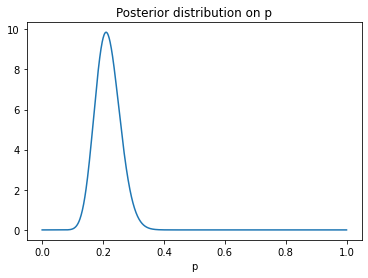

0.21021021021021022

In [1616]:
def bernoulli_sampling(p, n):
    """
    Simulate n tosses of a coin which gives heads with probability 
    p. Then use that sample to calculate the posterior distribution on 
    p given a uniform prior.

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate

    Returns:
        (float): The MAP estimate of p
    """
    # Simulate n bernoulli trials and calculate mean
    success = np.random.binomial(n, p)
    mean = success / n

    # Define the likelihood function and make a linespace
    liklihood = lambda p: p ** (n * mean) * (1 - p) ** (n * (1 - mean))
    x = np.linspace(0, 1, 1000)
    y = liklihood(x)

    # Find the integral of the likelihood function and get the posterior
    integral = np.trapz(y, x)
    posterior = y / integral

    # Plot the posterior
    plt.plot(x, posterior)
    plt.title("Posterior distribution on p")
    plt.xlabel("p")
    plt.show()

    # Find the MAP estimate
    map_estimate = x[np.argmax(posterior)]
    return map_estimate

bernoulli_sampling(0.2, 100)
    

# Problem 2

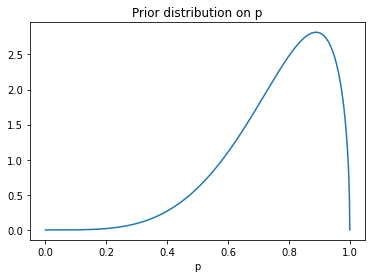

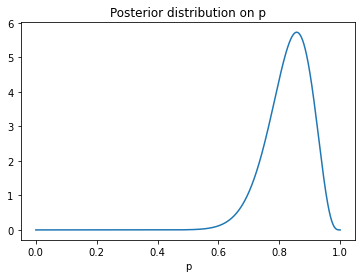

0.8568568568568569

In [1617]:
def non_uniform_prior(p, n, prior):
    """
    Generate a sample of size n that has a Bernoulli
    distribution with a probability parameter p.
    Use Bayes' theorem to compute the posterior distribution
    for the given prior and the generated sample:
    
        P(t|x) = P(x|t) P(t) / P(x)
    
    Plot both prior and posterior distributions between [0, 1]

    Parameters:
        p (float): probability of a successful bernoulli trial
        n (int): number of bernoulli trials to simulate
        prior (scipy dist): the prior distribution on p

    Returns:
        (float): MAP estimate
    """
    # Simulate n bernoulli trials and calculate mean
    success = np.random.binomial(n, p)
    mean = success / n

    # Define the likelihood function and the prior distribution
    liklihood = lambda p: p ** (n * mean) * (1 - p) ** (n * (1 - mean))
    priorpdf = lambda p: prior.pdf(p)
    
    # Define the linespace and calculate the posterior
    x = np.linspace(0, 1, 1000)
    y = liklihood(x) * priorpdf(x)

    # Find the integral of the likelihood function and get the posterior
    integral = np.trapz(y, x)
    posterior = y / integral

    # Plot the prior
    plt.plot(x, priorpdf(x))
    plt.title("Prior distribution on p")
    plt.xlabel("p")
    plt.show()
    
    # Plot the posterior
    plt.plot(x, posterior)
    plt.title("Posterior distribution on p")
    plt.xlabel("p")
    plt.show()

    # Find and return the MAP estimate
    map_estimate = x[np.argmax(posterior)]
    return map_estimate

non_uniform_prior(0.9, 20, beta(5, 1.5))

    

# Problem 3

In [1618]:
transition_matrix = np.array(
  [
    [0.6,0.1,0.3],
    [0.2,0.6,0.2],
    [0.3,0.4,0.3]
  ]
)

In [1619]:
def weather_forecast(transition_matrix, days=10):
    """
    Given the above transition matrix and assuming the 0th day is sunny,
    sample from the markov chain to give a possible forecast of the 10 following
    days. Return a list of strings, not including the 0th day.
    """
    # Define the states and the initial state. Also intialize the forecast
    strings = ["sun", "rain", "wind"]
    forecast = []
    current = 0

    # Loop over the number of days and sample from the transition matrix
    for i in range(days):
        current = np.random.choice([0, 1, 2], p=transition_matrix[current])
        forecast.append(strings[current])
    
    # Return the forecast
    return forecast

weather_forecast(transition_matrix)


['sun', 'sun', 'sun', 'wind', 'wind', 'wind', 'rain', 'wind', 'wind', 'rain']

# Problem 4

In [1620]:
data = bernoulli.rvs(0.2, size=30)

/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


0.2816298332893892

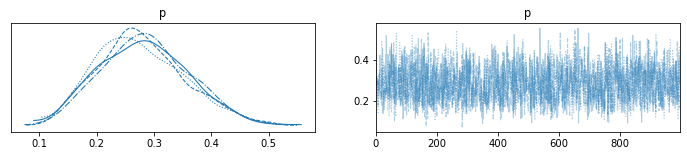

In [1621]:
def posterior_sampling(data, n=1000):
    """
    Given data that flips a coin 100 times, assume the data are distributed 
    as Bernoulli(p) for some unknown value of p, where p has a prior of 
    Beta(1,1). Set up a PyMC3 model for this situation and sample from the 
    poterior n times. Plot the trace plot and return the expected value of
    the posterior.
    
    Parameters:
        data (array): The coin flips
        n (int): number of samples to take from the posterior
        
    Returns:
        Mean (float): The average of the coin flips (estimated p)
    """
    # Define the model
    model = pm.Model()
    with model:

        # Define the prior and the likelihood
        p1 = pm.Beta('p', alpha=1, beta=1)
        y = pm.Bernoulli('y', p=p1, observed=data)
        
        # Sample from the posterior and plot the trace plot
        trace = pm.sample(n)
        az.plot_trace(trace)
        
        # Return the mean of the posterior
        new_p = trace['p'] 
        mean = np.mean(new_p)
    return mean
    
posterior_sampling(data, 1000)



# Problem 5

In [1622]:
heights = np.random.normal(180,10,100)

/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu]


/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/samlayton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


179.98307255945267

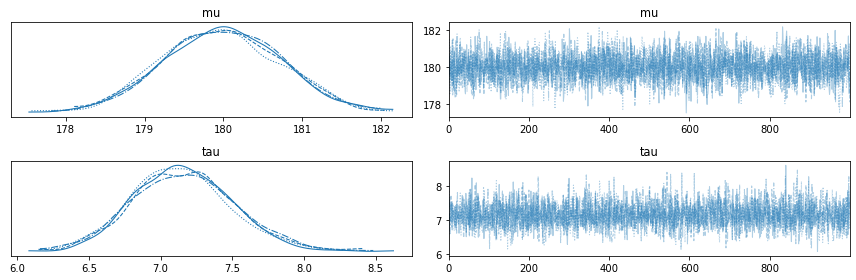

In [1623]:
def height_model(observed_heights,m=180,s=10,alpha=2,beta=10,n=1000):
    """
    Given a dataset of the measured heights of 100 men, assume the data are
    distributed as Normal(mu, 1/tau) where mu has a prior of Normal(m, s), 
    and tau has a prior of Gamma(alpha, beta). Set up a PyMC3 model for this 
    situation and sample from the poterior n times. Plot the trace plots for 
    mu and tau, and return the expected value of the posterior of mu.
    
    Parameters:
        observed_heights (array): The measured heights of 100 men
        m (int): the mean in the prior distribution of mu
        s (int): the standard deviation in the prior distribution of mu
        alpha (int): the first component in the prior distibution of tau
        beta (int): the second component in the prior distribution of tau
        n (int): number of samples from the posterior
        
    Returns:
        mu_mean (float): the estimated value of mu
    """
    # Define the model
    model = pm.Model()
    with model:

        # Define the priors and the likelihood
        mu = pm.Normal('mu', m, s)
        tau = pm.Gamma('tau', alpha, beta)
        y = pm.Normal('y', mu, tau, observed=heights)
        
        # Sample from the posterior and plot the trace plots
        trace = pm.sample(n)
        az.plot_trace(trace)
        plt.tight_layout()
        
        # Return the mean of the posterior
        mu_mean = np.mean(trace['mu'])
    return mu_mean

height_model(heights)